<a href="https://colab.research.google.com/github/piyush182004/CODE-ALPHA_DS/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving portfolio_data.csv to portfolio_data.csv


In [2]:
import pandas as pd

# Replace 'your_dataset.csv' with the name of your uploaded file
df = pd.read_csv('/content/portfolio_data.csv')
print(df.head())


       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285


In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

# Create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 50
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(X_train.shape[2]))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0191 - val_loss: 0.0552
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0022 - val_loss: 0.0403
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0017 - val_loss: 0.0252
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0015 - val_loss: 0.0184
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0013 - val_loss: 0.0119
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0011 - val_loss: 0.0093
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0010 - val_loss: 0.0094
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 8.1179e-04 - val_loss: 0.0085
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 9.8371e-04 - val_loss: 0.0058
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 8.5919e-04 - val_loss: 0.0089
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 7.7501e-04 - val_loss: 0.0086
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 44m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


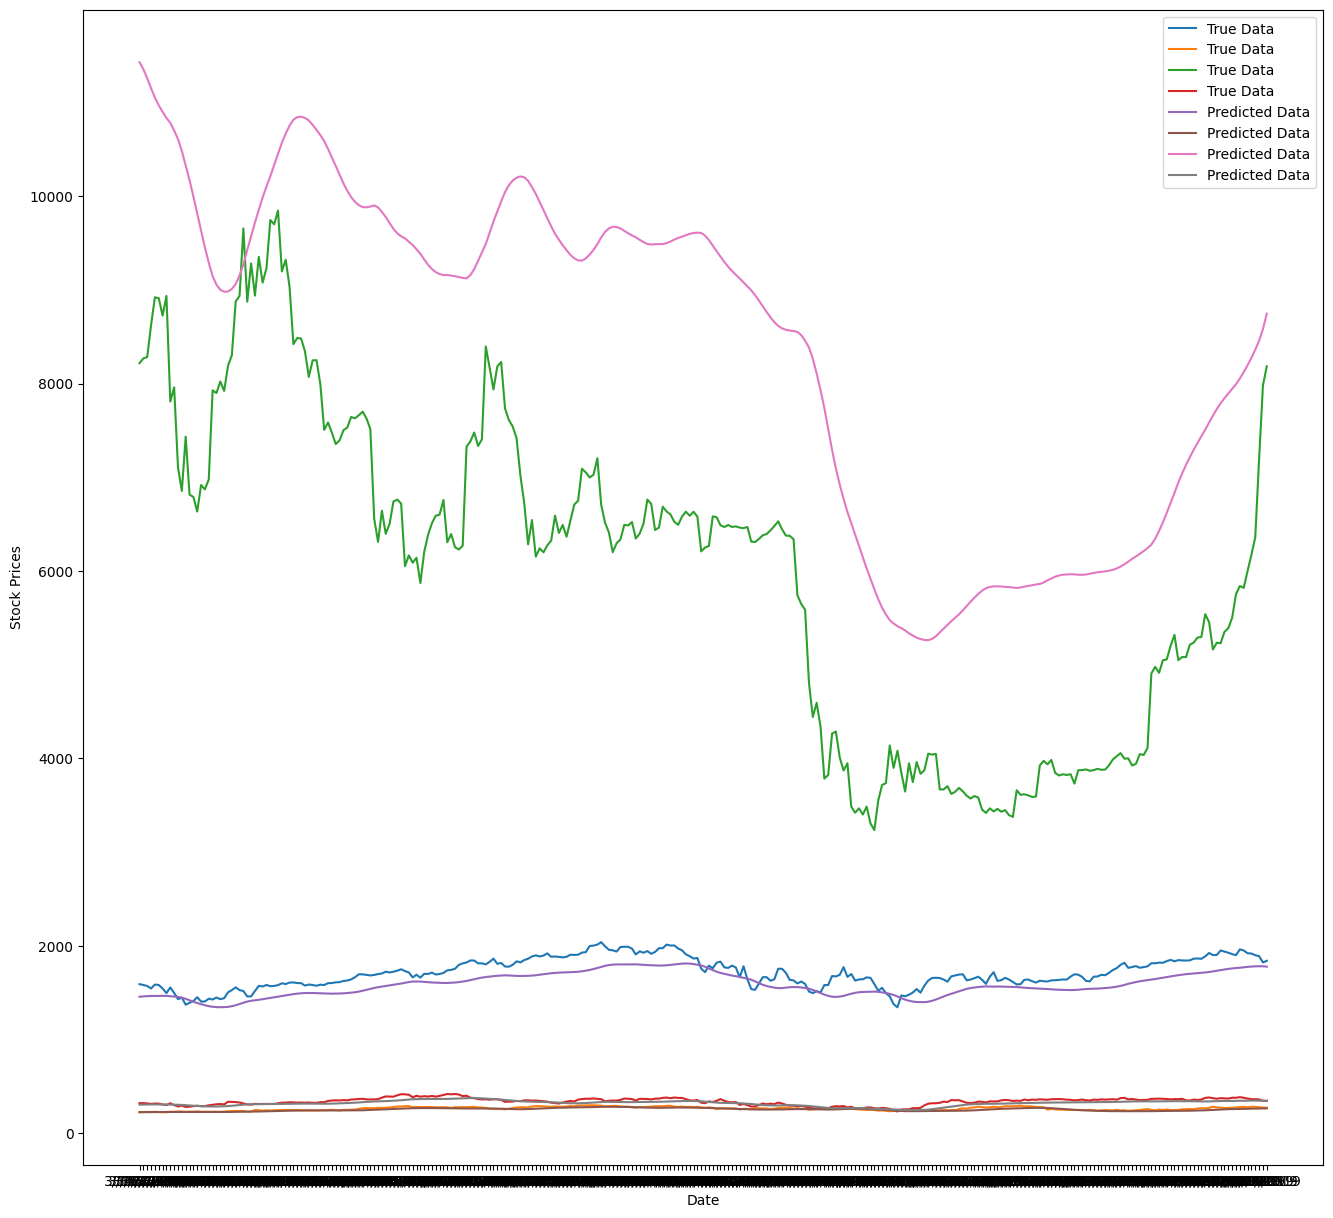

In [10]:
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Ensure the 'date' column is correctly referenced
dates = df['Date'].values

# Plot the results
plt.figure(figsize=(16, 15))
plt.plot(dates[split + SEQ_LENGTH:], scaler.inverse_transform(y_test), label='True Data')
plt.plot(dates[split + SEQ_LENGTH:], predictions, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()
